<a href="https://colab.research.google.com/github/Nmarinsiruela/Curso-ML-Python/blob/master/NMS_4_Regresi%C3%B3n_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 4 - Clasificación Logística


*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*

## 1. Análisis exploratorio.

En esta ocasión, se va a resolver el problema de clasificación sobre el Wisconsin Breast Cancer dataset. Este dataset ya está en la carpeta resources de este github, pero de otra forma, sería necesario descargarlo desde la plataforma *Kaggle*.

Esta web es el punto de encuentro ideal para aquellas personas que quieran aprender y mejorar sus habilidades como Data Scientist. No solo cuenta con competiciones mensuales donde se puede probar a crear el mejor modelo predictivo (¡Y ganar una buena pasta!), sino que también se pueden consultar Notebooks Jupyter (llamados Kernels en la web) de otros profesionales de los que se puede aprender su modo de trabajo. Esta web podría considerarse el GitHub de los Data Scientist, y por ello se recomienda particupar y aprender de ella.

Dicho esto, se puede descargar el dataset original a través del siguiente link, aunque recuerda que el archivo preparado ya está en la carpeta resources de GitHub!
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

__

1.  Cargar el dataset desde el archivo .csv utilizando **Pandas**  (*pd.read_csv()*) y crear la matriz de datos de entrada $X$, que contengan las variables que indiquen las propiedades de los núcleos de las células, y el vector de salida $Y$ que contiene la información de si el cancer es benigno ('B') o maligno ('M'). Se puede comprobar en *Kaggle* la información de este dataset.

2. Para el análisis de Machine Learning que se va a utilizar, es conveniente que el vector $Y$ represente las dos posibles clases con números enteros y no letras. Transforma el contenido del vector de salida $Y$ para que contenga un 0 si el cancer es benigno y un 1 si el cancer es maligno. Puede servir de ayuda utilizar la función ***.map()***.

3. Para analizar si existe alguna relación entre las variables, se va a calcular la matriz de correlación a pares. Esto se puede hacer usando la función ***numpy.corrcoef***, o si el dataset es de tipo ***Panda.DataFrame*** con la función ***.corr()***. Visualiza la matriz de correlación obtenida y cuida el estilo para que la visualización pueda ser entendida: nombres de variables en cada eje, tamaño adecuado, barra de color que indique la leyenda utilizada, etc. En este sentido quizás sea más cómodo usar la librería de visualización ***Seaborn*** y su función **sb.heatmap()**, que para este caso es mucho más potente.

4. Para resolver un problema de Clasificación no es tan importante saber cuál es la correlación de las variables de entrada. Sin enbargo, muchas de ellas pueden ser innecesarias y perjudicar al rendimiento del algoritmo a causa de lo que se conoce cómo ***La Maldición de la Dimensionalidad.*** Interpreta la matriz de correlación que se ha graficado en el apartado 3. ¿Qué patrones se identifican?¿Qué pueden significar?

**Ojo!** Al cargar el dataset, recuerda indicar qué columna contiene los índices de los datos, con el parámetro *index_col=* para evitar que ***Pandas*** incluya una columna innecesaria. 

**Extra** Si se quiere ver cómo un experto trata la selección de variables en este dataset (para reducir la dimensionalidad del problema), se puede consultar este notebook en *Kaggle* : [https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization](https://)

In [0]:
import numpy   as np
import scipy   as sc
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt

Ejercicio 3


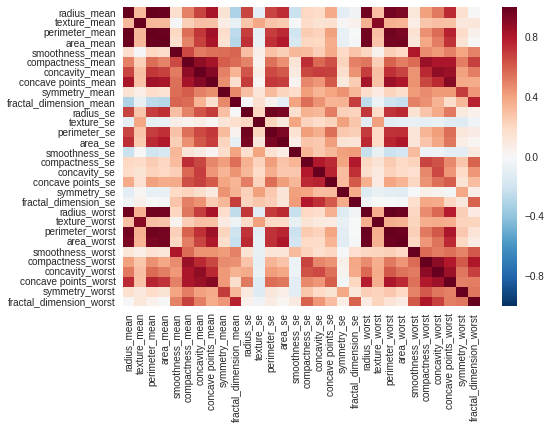

In [50]:
# 1

# Ojo: El dataset original tenía una coma extra al final. Es necesario borrarla.
# Se usa index_col para quitar la columna de ids!
data = pd.read_csv("breast-cancer-wisconsin-data.csv", index_col=0)

Y_raw = data["diagnosis"]
Y_mb = Y_raw[:, np.newaxis]
X = data.drop(columns="diagnosis")

# 2

# Sabiendo que el vector solo contiene 'M' o 'B', se puede rehacer el vector
# de esta forma tan sencilla:
Y = [0 if element == "B" else 1 for element in Y_mb]
Ync = Y
Y = np.matrix(Y)
Y = Y.T

# 3
print("Ejercicio 3")
sb.heatmap(X.corr())
plt.show()

# 4

# Como puede verse en la matriz de correlación, hay algunas variables muy
# relacionadas entre sí. Dichas variables, por tanto, no añaden información
# sino ruido, por lo que sería apropiado eliminar todas menos una de ellas, ya
# que en el fondo, con una tendremos la misma cantidad de información.







## 2. Regresión Logística - (Sklearn).

---

1.  Recuerda que para medir la capacidad del modelo de poder generalizar sus predicciones y controlar la aparición de ***overfitting***, una manera sencilla (y frecuentemente utilizada), es la de dividir de manera aleatoria el conjunto de datos en un *dataset de entrenamiento*, con el que se ajusta el modelo, y un *dataset de prueba*, con el que se evalúa el modelo. Aquí se comprueba si el modelo generaliza o no, puesto que los datos con los que se evalúa nunca antes han sido vistos por el modelo durante el entrenamiento. En este sentido, utiliza la función ***sklearn.train_test_split()*** para que se genere aleatoriamente un conjunto de datos de entrenamiento y de validación. Busca la manera para que el tamaño de los conjuntos de datos train/test sea de 70%/30%.

2. Utilizar el modelo de Regresión Logística implementado en Sklearn (***sklearn.linear_model.LogisticRegression()***) para elaborar un modelo clasificador binario que utilize las variables de entrada $X$ para predecir si las celulas identificadas son *Benignas* o *Malignas*. Recuerda entrenar el modelo con el conjunto de datos de entrenamiento generados en el *apartado 1* y valídalo usando la función ***score()*** sobre el conjunto de datos de validación. Se tiene toda la libertad para seleccionar las variables de entrada que se consideren más importantes, muchas o pocas, de preprocesarlas como se crea razonable o de buscar en Internet otras técnicas que permitan mejorar así la precisión del modelo. Eso sí, justificar siempre las decisiones. ¡Este es el trabajo real de un Data Scientist! 

** Importante:** Notar que una vez se obtiene un modelo entrenado y se evalúa con la función ***score()***, cada vez que se ejecute la celda de nuevo, este valor irá cambiando. Esto se produce porque se genera una partición aleatoria train/test nueva cada vez, y por tanto, el rendimiento del modelo va variando. Una solución para que comparar en igualdad de condiciones es añadir el atributo *random_state=0* a la función *train_test_split()* para eliminar esa aleatoriedad (OJO! Esto no sería una buena práctica en ML)

In [49]:
from sklearn.datasets        import load_iris
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import scale
from sklearn.preprocessing   import PolynomialFeatures

def logistic_regression(Xm, Ync, message, random_num=0, times=100):
  result = []
  for time in range(times):
    x_train, x_test, y_train, y_test = train_test_split(Xm, Ync, 
                                                        random_state=random_num)

    model = LogisticRegression(solver='liblinear')
    model.fit(x_train, y_train)
    acc = model.score(x_test, y_test)
    result.append(acc)
  return (F"Accuracy: {np.mean(result)} with: {message}")

  
Xm = X
Xpol = PolynomialFeatures(2).fit_transform(X)
random_num = np.random.randint(101)
# Para este ejercicio se van a mostrar distintos resultados. Con el fin de 
# que puedan apreciarse los valores, se han fijado con el random_state=0 la
# semilla aleatoria del train_test_split. ¡No hacer esto en casos reales!

# Se prueba sin haber hecho nada a la variable de entrada.
no_changes = logistic_regression(Xm, Ync, "No changes", random_num)

# Se suprimen las variables que añaden información extra.
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean',
              'concave points_mean','radius_se','perimeter_se',
              'radius_worst','perimeter_worst','compactness_worst',
              'concave points_worst','compactness_se',
              'concave points_se','texture_worst','area_worst']
Xdrop_list = X.drop(drop_list1,axis = 1 )

dropping = logistic_regression(Xdrop_list, Ync,
                               "Dropping correlated variables", random_num)

# Se aplica la función de escala.
standard = logistic_regression(scale(Xm, with_mean=True, with_std=True),
                               Ync, 
                               "Standardizing variables", random_num)

# Se aplica una polinomial.
poly = logistic_regression(Xpol,
                               Ync, 
                               "Polynomial transformation", random_num)


# Se aplica la función de escala y se suprimen variables.
standard_dropping = logistic_regression(
                              scale(Xdrop_list, with_mean=True, with_std=True),
                              Ync,
                              "Standardizing with dropping variables",
                              random_num)

# Se aplica la función de escala a la polinómica.
standard_poly = logistic_regression(
                              scale(Xpol, with_mean=True, with_std=True),
                              Ync,
                              "Standardizing with polynomial", random_num)

print(no_changes)
print(dropping)
print(standard)
print(poly)
print(standard_dropping)
print(standard_poly)


Accuracy: 0.9790209790209786 with: No changes
Accuracy: 0.9510489510489509 with: Dropping correlated variables
Accuracy: 0.9790209790209786 with: Standardizing variables
Accuracy: 0.9720279720279719 with: Polynomial transformation
Accuracy: 0.9720279720279719 with: Standardizing with dropping variables
Accuracy: 0.9720279720279719 with: Standardizing with polynomial
